# 성과정보 EDA

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import sys
sys.path.append('../utils')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from preprocessing import (
    DateElapsedTransformer, NumericFeaturePreprocessor, ObjectFeaturePreprocessor, NumericTypeOptimizer,
)

pre_optimizer = NumericTypeOptimizer(mode='pre')
date_transformer = DateElapsedTransformer()
numeric_transformer = NumericFeaturePreprocessor()
object_transformer = ObjectFeaturePreprocessor()
post_optimizer = NumericTypeOptimizer(mode='post')

preprocessing_pipeline = Pipeline([
    ('pre_optimizer', pre_optimizer),
    ('object', object_transformer),
    ('date', date_transformer),
    ('numeric', numeric_transformer),
    ('post_optimizer', post_optimizer),
])

# Set display configuration to visualize the pipeline
set_config(display='diagram')

# Display the pipeline
preprocessing_pipeline

Pipeline(steps=[('pre_optimizer', NumericTypeOptimizer(mode='pre')),
                ('object',
                 ObjectFeaturePreprocessor(exclude_columns=['ID', 'Segment'])),
                ('date',
                 DateElapsedTransformer(base_date=Timestamp('2019-01-01 00:00:00'),
                                        exclude_columns=['ID', 'Segment',
                                                         '기준년월'])),
                ('numeric',
                 NumericFeaturePreprocessor(exclude_columns=['기준년월'])),
                ('post_optimizer', NumericTypeOptimizer())])

In [3]:
from sklearn.preprocessing import LabelEncoder
from data_loader import load_data

perf_df, perf_test_df = load_data("8.성과정보")

X = perf_df.drop(columns=['ID', '기준년월'])
X = preprocessing_pipeline.fit_transform(X)
X.info()

✅ File: ../../dataset/train/8.성과정보\201807_train_성과정보.parquet Completed!
✅ File: ../../dataset/train/8.성과정보\201808_train_성과정보.parquet Completed!
✅ File: ../../dataset/train/8.성과정보\201809_train_성과정보.parquet Completed!
✅ File: ../../dataset/train/8.성과정보\201810_train_성과정보.parquet Completed!
✅ File: ../../dataset/train/8.성과정보\201811_train_성과정보.parquet Completed!
✅ File: ../../dataset/train/8.성과정보\201812_train_성과정보.parquet Completed!
🔹 Shape : (2400000, 49)

✅ File: ../../dataset/test/8.성과정보\201807_test_성과정보.parquet Completed!
✅ File: ../../dataset/test/8.성과정보\201808_test_성과정보.parquet Completed!
✅ File: ../../dataset/test/8.성과정보\201809_test_성과정보.parquet Completed!
✅ File: ../../dataset/test/8.성과정보\201810_test_성과정보.parquet Completed!
✅ File: ../../dataset/test/8.성과정보\201811_test_성과정보.parquet Completed!
✅ File: ../../dataset/test/8.성과정보\201812_test_성과정보.parquet Completed!
🔹 Shape : (600000, 49)
Numeric Type Optimizer Transforming...
🧠 [mode=pre] 메모리 최적화: 860.60 MB → 860.60 MB (0.0% 감소)
Object 

In [5]:
performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 49 columns):
 #   Column              Dtype  
---  ------              -----  
 0   기준년월                uint32 
 1   ID                  object 
 2   증감율_이용건수_신용_전월      float16
 3   증감율_이용건수_신판_전월      float16
 4   증감율_이용건수_일시불_전월     float16
 5   증감율_이용건수_할부_전월      float16
 6   증감율_이용건수_CA_전월      float16
 7   증감율_이용건수_체크_전월      float16
 8   증감율_이용건수_카드론_전월     float16
 9   증감율_이용금액_신용_전월      float16
 10  증감율_이용금액_신판_전월      float16
 11  증감율_이용금액_일시불_전월     float16
 12  증감율_이용금액_할부_전월      float16
 13  증감율_이용금액_CA_전월      float16
 14  증감율_이용금액_체크_전월      float16
 15  증감율_이용금액_카드론_전월     float16
 16  증감율_이용건수_신용_분기      float16
 17  증감율_이용건수_신판_분기      float16
 18  증감율_이용건수_일시불_분기     float16
 19  증감율_이용건수_할부_분기      float16
 20  증감율_이용건수_CA_분기      float16
 21  증감율_이용건수_체크_분기      float16
 22  증감율_이용건수_카드론_분기     float16
 23  증감율_이용금액_신용_분기      float16
 24  증감율_이용금액_신판_분기      floa

In [6]:
performance_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   기준년월                600000 non-null  uint32 
 1   ID                  600000 non-null  object 
 2   증감율_이용건수_신용_전월      600000 non-null  float16
 3   증감율_이용건수_신판_전월      600000 non-null  float16
 4   증감율_이용건수_일시불_전월     600000 non-null  float16
 5   증감율_이용건수_할부_전월      600000 non-null  float16
 6   증감율_이용건수_CA_전월      600000 non-null  float16
 7   증감율_이용건수_체크_전월      600000 non-null  float16
 8   증감율_이용건수_카드론_전월     600000 non-null  float16
 9   증감율_이용금액_신용_전월      600000 non-null  float16
 10  증감율_이용금액_신판_전월      600000 non-null  float16
 11  증감율_이용금액_일시불_전월     600000 non-null  float16
 12  증감율_이용금액_할부_전월      600000 non-null  float16
 13  증감율_이용금액_CA_전월      600000 non-null  float16
 14  증감율_이용금액_체크_전월      600000 non-null  float16
 15  증감율_이용금액_카드론_전월     600000 non-nul

In [8]:
float_columns = performance_df.select_dtypes(include=['float16']).columns
float_columns

Index(['증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월',
       '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월',
       '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월',
       '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기', '증감율_이용건수_신판_분기',
       '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기', '증감율_이용건수_체크_분기',
       '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기',
       '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기',
       '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m',
       '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m',
       '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m',
       '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔',
       '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M',
       '혜택수혜율_R3M', '혜택수혜율_B0M'],
      dtype='object')

In [9]:
float_unique_values = {col: performance_df[col].unique() for col in float_columns}
float_unique_values

{'증감율_이용건수_신용_전월': array([ 4.546e-01, -5.117e-01, -6.274e-02, ..., -3.414e-04, -1.714e-03,
         8.565e-05], shape=(25279,), dtype=float16),
 '증감율_이용건수_신판_전월': array([ 4.546e-01, -5.117e-01, -6.274e-02, ..., -3.414e-04, -1.714e-03,
         8.565e-05], shape=(25268,), dtype=float16),
 '증감율_이용건수_일시불_전월': array([ 3.647e-01, -5.117e-01,  6.787e-02, ..., -1.402e-04, -3.414e-04,
        -1.714e-03], shape=(25217,), dtype=float16),
 '증감율_이용건수_할부_전월': array([ 2.    ,  0.    , -2.    , -0.584 , -0.579 , -0.5845, -0.58  ,
        -0.5806, -0.59  , -0.586 , -0.5854, -0.5903, -0.576 , -0.5767,
        -0.575 , -0.5757, -0.577 , -0.583 , -0.581 , -0.5815, -0.5786,
        -0.5684, -0.5796, -0.5864, -0.585 , -0.5825, -0.5874, -0.5776,
        -0.589 , -0.578 , -0.5835, -0.5747, -0.582 , -0.587 , -0.592 ,
        -0.574 , -0.588 , -0.573 , -0.5728, -0.591 , -0.5737, -0.5884,
        -0.5933, -0.572 , -0.571 , -0.5913, -0.5947, -0.593 , -0.5894,
        -0.5723, -0.57  , -0.5713, -0.594 , -0.5693,

In [10]:
drop_cols = [col for col in float_unique_values if performance_df[col].nunique() <= 1]
print(f"🔹 column 수: {len(drop_cols)}")
drop_cols

🔹 column 수: 0


[]

In [11]:
int_columns = performance_df.select_dtypes(include=['integer']).columns
int_columns

Index(['기준년월'], dtype='object')

In [ ]:
performance_df.isnull().sum()

# 결과 : 혜택수혜율_R3M, 혜택수혜율_B0M에 결측치 존재

기준년월                       0
ID                         0
증감율_이용건수_신용_전월             0
증감율_이용건수_신판_전월             0
증감율_이용건수_일시불_전월            0
증감율_이용건수_할부_전월             0
증감율_이용건수_CA_전월             0
증감율_이용건수_체크_전월             0
증감율_이용건수_카드론_전월            0
증감율_이용금액_신용_전월             0
증감율_이용금액_신판_전월             0
증감율_이용금액_일시불_전월            0
증감율_이용금액_할부_전월             0
증감율_이용금액_CA_전월             0
증감율_이용금액_체크_전월             0
증감율_이용금액_카드론_전월            0
증감율_이용건수_신용_분기             0
증감율_이용건수_신판_분기             0
증감율_이용건수_일시불_분기            0
증감율_이용건수_할부_분기             0
증감율_이용건수_CA_분기             0
증감율_이용건수_체크_분기             0
증감율_이용건수_카드론_분기            0
증감율_이용금액_신용_분기             0
증감율_이용금액_신판_분기             0
증감율_이용금액_일시불_분기            0
증감율_이용금액_할부_분기             0
증감율_이용금액_CA_분기             0
증감율_이용금액_체크_분기             0
증감율_이용금액_카드론_분기            0
잔액_신판평균한도소진율_r6m           0
잔액_신판최대한도소진율_r6m           0
잔액_신판평균한도소진율_r3m           0
잔액_신판최대한도소진율_r3m           0
잔액_신판ca평균한도소진율

In [19]:
target_column = ['혜택수혜율_R3M', '혜택수혜율_B0M']

for col in target_column:
    performance_df[col] = performance_df[col].fillna(0)
    performance_test_df[col] = performance_test_df[col].fillna(0)

In [20]:
performance_df.isnull().sum()

기준년월                  0
ID                    0
증감율_이용건수_신용_전월        0
증감율_이용건수_신판_전월        0
증감율_이용건수_일시불_전월       0
증감율_이용건수_할부_전월        0
증감율_이용건수_CA_전월        0
증감율_이용건수_체크_전월        0
증감율_이용건수_카드론_전월       0
증감율_이용금액_신용_전월        0
증감율_이용금액_신판_전월        0
증감율_이용금액_일시불_전월       0
증감율_이용금액_할부_전월        0
증감율_이용금액_CA_전월        0
증감율_이용금액_체크_전월        0
증감율_이용금액_카드론_전월       0
증감율_이용건수_신용_분기        0
증감율_이용건수_신판_분기        0
증감율_이용건수_일시불_분기       0
증감율_이용건수_할부_분기        0
증감율_이용건수_CA_분기        0
증감율_이용건수_체크_분기        0
증감율_이용건수_카드론_분기       0
증감율_이용금액_신용_분기        0
증감율_이용금액_신판_분기        0
증감율_이용금액_일시불_분기       0
증감율_이용금액_할부_분기        0
증감율_이용금액_CA_분기        0
증감율_이용금액_체크_분기        0
증감율_이용금액_카드론_분기       0
잔액_신판평균한도소진율_r6m      0
잔액_신판최대한도소진율_r6m      0
잔액_신판평균한도소진율_r3m      0
잔액_신판최대한도소진율_r3m      0
잔액_신판ca평균한도소진율_r6m    0
잔액_신판ca최대한도소진율_r6m    0
잔액_신판ca평균한도소진율_r3m    0
잔액_신판ca최대한도소진율_r3m    0
변동률_일시불평잔             0
변동률_RV일시불평잔           0
변동률_할부평잔              0
변동률_CA평잔        

## Feature Selection

In [21]:
segment_df = pd.read_parquet('../dataset/train/member.parquet', engine='fastparquet')
segment_df = segment_df[['ID', '기준년월', 'Segment']]

performance_df = performance_df.merge(segment_df, on=['ID', '기준년월'], how='left')

In [22]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

def get_feature_importance(X, y, importance_type='gain', plot_top_n=30):
    """
    LightGBM을 이용해 Feature Importance를 계산하고, 상위 feature를 시각화합니다.
    
    Parameters:
    - X (pd.DataFrame): feature 데이터
    - y (pd.Series or np.array): target 데이터
    - importance_type (str): 'gain' 또는 'split' (중요도 기준)
    - plot_top_n (int): 중요도가 높은 feature 몇 개를 plot할지
    - random_state (int): seed 고정

    Returns:
    - feature_importance_df (pd.DataFrame): feature importance 데이터프레임
    - model (lgb.Booster): 학습된 LightGBM 모델
    """

    # LightGBM 데이터셋 구성
    lgb_train = lgb.Dataset(X, label=y)

    # LightGBM 기본 파라미터 (가볍게 학습)
    params = {
        'objective': 'multiclass',   # 다중 클래스 분류
        'num_class': 5,  # 클래스 수 자동 지정
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',   # 다중 클래스 로지 손실
        'verbosity': -1,
        'seed': 42,
        'learning_rate': 0.05,
        'num_leaves': 31,
        'min_data_in_leaf': 20
    }

    # 빠르게 학습 (에포크 100회로 제한)
    model = lgb.train(params, lgb_train, num_boost_round=100)

    # Feature Importance 가져오기
    importance = model.feature_importance(importance_type=importance_type)
    feature_names = X.columns

    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # 시각화
    top_features = feature_importance_df.head(plot_top_n)
    
    plt.figure(figsize=(10, max(6, plot_top_n // 2)))
    plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
    plt.xlabel('Importance')
    plt.title(f'Top {plot_top_n} Feature Importance ({importance_type})')
    plt.tight_layout()
    plt.show()

    return feature_importance_df, model

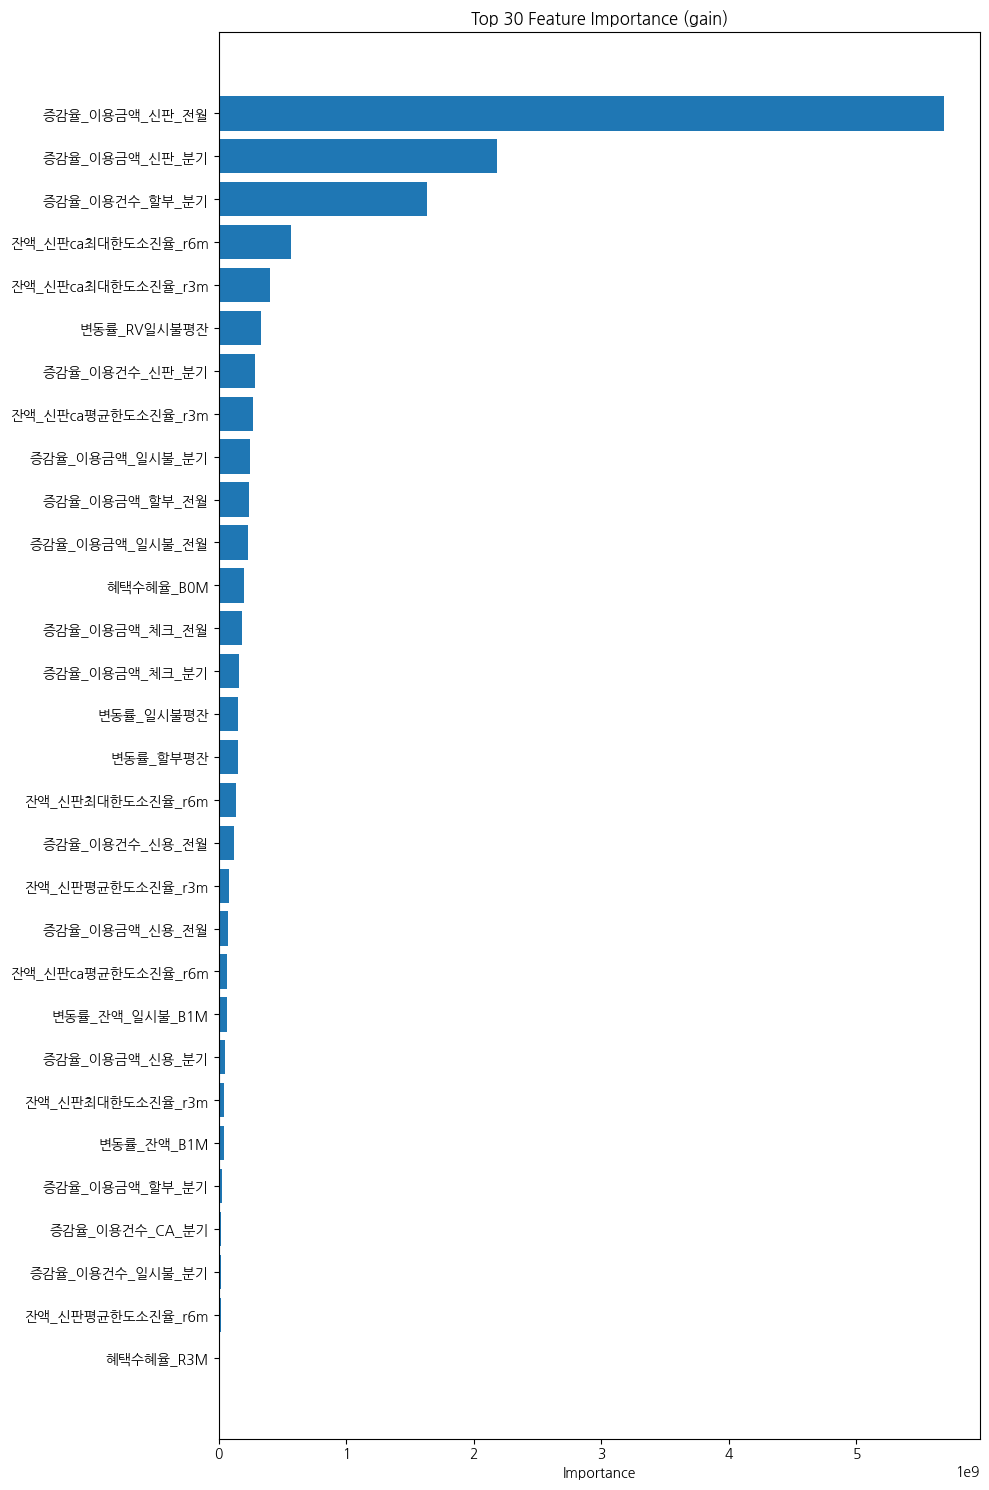

In [24]:
X = performance_df.drop(columns=['ID', '기준년월', 'Segment'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(performance_df['Segment'])

importance_df, model = get_feature_importance(X, y, importance_type='gain', plot_top_n=30)

In [25]:
def select_top_features(importance_df, X, top_percent=0.3):
    """
    중요도 데이터프레임에서 상위 top_percent 비율만큼 feature를 선택하여 데이터셋 추출

    Parameters:
    - importance_df (pd.DataFrame): feature와 importance를 가진 데이터프레임
    - X (pd.DataFrame): 원본 feature 데이터셋
    - top_percent (float): 상위 몇 %를 선택할지 (기본 30%)

    Returns:
    - X_top (pd.DataFrame): 상위 feature만 선택된 데이터프레임
    - selected_features (list): 선택된 feature 리스트
    """
    n_features = int(len(importance_df) * top_percent)
    selected_features = importance_df['feature'].iloc[:n_features].tolist()
    X_top = X[selected_features]
    return X_top, selected_features

In [26]:
X_top, selected_features = select_top_features(importance_df, X, top_percent=0.4)
print(f"🔹 선택된 feature 수: {len(selected_features)}")
print(f"🔹 선택된 feature: {selected_features}")

🔹 선택된 feature 수: 18
🔹 선택된 feature: ['증감율_이용금액_신판_전월', '증감율_이용금액_신판_분기', '증감율_이용건수_할부_분기', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca최대한도소진율_r3m', '변동률_RV일시불평잔', '증감율_이용건수_신판_분기', '잔액_신판ca평균한도소진율_r3m', '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_전월', '증감율_이용금액_일시불_전월', '혜택수혜율_B0M', '증감율_이용금액_체크_전월', '증감율_이용금액_체크_분기', '변동률_일시불평잔', '변동률_할부평잔', '잔액_신판최대한도소진율_r6m', '증감율_이용건수_신용_전월']


In [27]:
def plot_feature_correlation(X_top, threshold=0.8):
    """
    상위 feature들 간의 상관계수 행렬을 시각화하고, 
    threshold 이상인 feature쌍을 출력

    Parameters:
    - X_top (pd.DataFrame): 상위 feature 데이터프레임
    - threshold (float): 높은 상관관계로 간주할 기준
    """
    # 수치치형 feature만 선택
    numeric_features = X_top.select_dtypes(include=['number'])
    corr_matrix = numeric_features.corr()
    print(" 상관계수 행렬 생성 완료..!")

    # 상관관계 히트맵 그리기
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Top Features')
    plt.show()

    # threshold 이상인 feature 쌍 출력
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    if high_corr_pairs:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍:")
        for f1, f2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"🔹{f1} vs {f2}: 상관계수 = {corr:.3f}")
    else:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍이 없습니다.")
    
    return high_corr_pairs

 상관계수 행렬 생성 완료..!


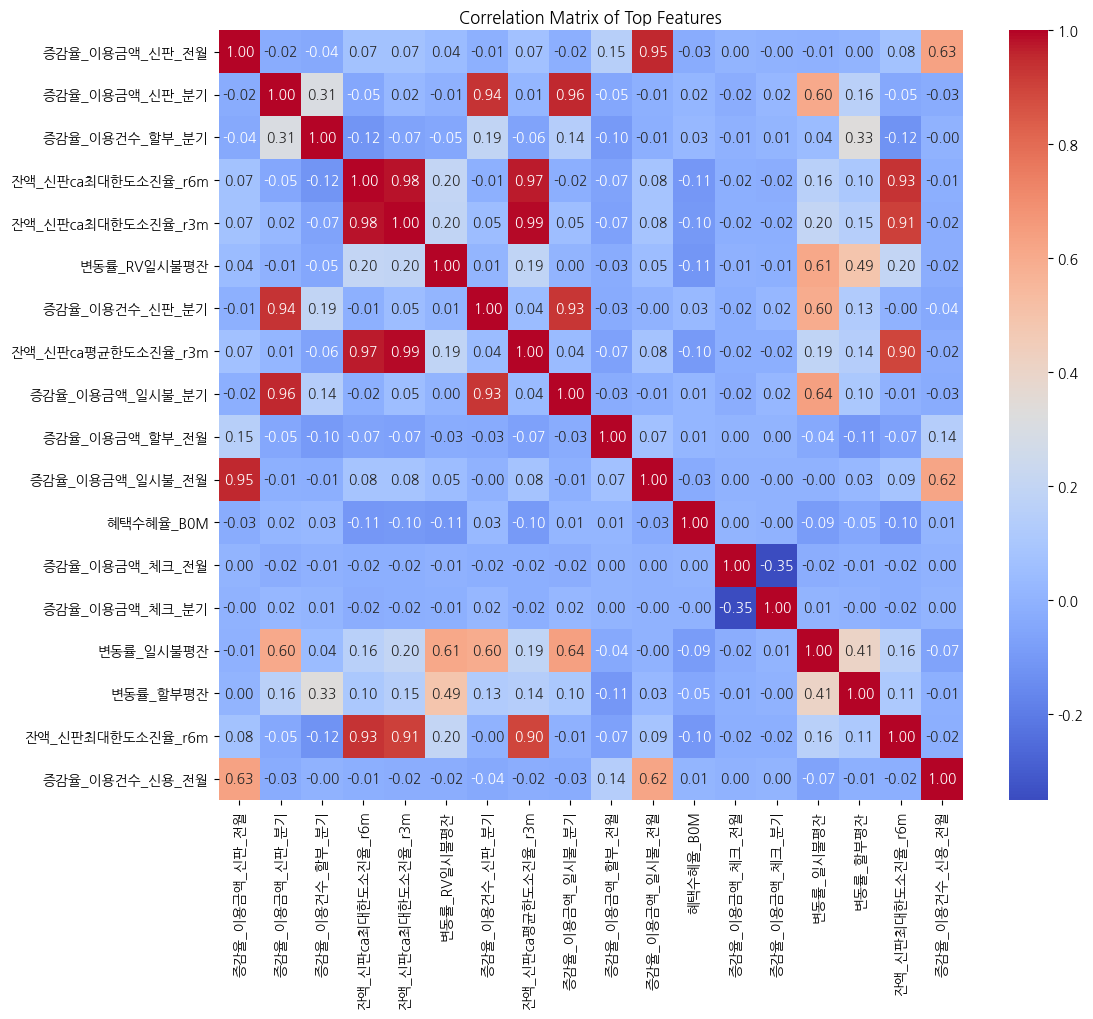


상관계수 0.8 이상인 feature 쌍:
🔹잔액_신판ca평균한도소진율_r3m vs 잔액_신판ca최대한도소진율_r3m: 상관계수 = 0.994
🔹잔액_신판ca최대한도소진율_r3m vs 잔액_신판ca최대한도소진율_r6m: 상관계수 = 0.980
🔹잔액_신판ca평균한도소진율_r3m vs 잔액_신판ca최대한도소진율_r6m: 상관계수 = 0.973
🔹증감율_이용금액_일시불_분기 vs 증감율_이용금액_신판_분기: 상관계수 = 0.957
🔹증감율_이용금액_일시불_전월 vs 증감율_이용금액_신판_전월: 상관계수 = 0.953
🔹증감율_이용건수_신판_분기 vs 증감율_이용금액_신판_분기: 상관계수 = 0.936
🔹잔액_신판최대한도소진율_r6m vs 잔액_신판ca최대한도소진율_r6m: 상관계수 = 0.934
🔹증감율_이용금액_일시불_분기 vs 증감율_이용건수_신판_분기: 상관계수 = 0.931
🔹잔액_신판최대한도소진율_r6m vs 잔액_신판ca최대한도소진율_r3m: 상관계수 = 0.908
🔹잔액_신판최대한도소진율_r6m vs 잔액_신판ca평균한도소진율_r3m: 상관계수 = 0.897


In [28]:
# 상관계수 0.8 이상인 feature 쌍을 시각화
high_corr_pairs = plot_feature_correlation(X_top, threshold=0.8)

In [29]:
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
high_corr_pairs

[('잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m', np.float64(0.9940693005845391)),
 ('잔액_신판ca최대한도소진율_r3m', '잔액_신판ca최대한도소진율_r6m', np.float64(0.9799220327615417)),
 ('잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r6m', np.float64(0.9731514076094109)),
 ('증감율_이용금액_일시불_분기', '증감율_이용금액_신판_분기', np.float64(0.9572654576986132)),
 ('증감율_이용금액_일시불_전월', '증감율_이용금액_신판_전월', np.float64(0.9534996028353655)),
 ('증감율_이용건수_신판_분기', '증감율_이용금액_신판_분기', np.float64(0.9360494343552898)),
 ('잔액_신판최대한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', np.float64(0.9338753939982063)),
 ('증감율_이용금액_일시불_분기', '증감율_이용건수_신판_분기', np.float64(0.9305121721401673)),
 ('잔액_신판최대한도소진율_r6m', '잔액_신판ca최대한도소진율_r3m', np.float64(0.9084263328434362)),
 ('잔액_신판최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', np.float64(0.8965150287184045))]

In [30]:
features_to_drop = set()
for f1, f2, corr in high_corr_pairs:
    if corr > 0.9:
        if f1 not in features_to_drop and f2 not in features_to_drop:
            features_to_drop.add(f1)

features_to_drop

{'잔액_신판ca최대한도소진율_r3m',
 '잔액_신판ca평균한도소진율_r3m',
 '잔액_신판최대한도소진율_r6m',
 '증감율_이용건수_신판_분기',
 '증감율_이용금액_일시불_분기',
 '증감율_이용금액_일시불_전월'}

In [31]:
for col in features_to_drop:
    X_top = X_top.drop(columns=[col])

X_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   증감율_이용금액_신판_전월      float16
 1   증감율_이용금액_신판_분기      float16
 2   증감율_이용건수_할부_분기      float16
 3   잔액_신판ca최대한도소진율_r6m  float16
 4   변동률_RV일시불평잔         float16
 5   증감율_이용금액_할부_전월      float16
 6   혜택수혜율_B0M           float16
 7   증감율_이용금액_체크_전월      float16
 8   증감율_이용금액_체크_분기      float16
 9   변동률_일시불평잔           float16
 10  변동률_할부평잔            float16
 11  증감율_이용건수_신용_전월      float16
dtypes: float16(12)
memory usage: 54.9 MB


In [32]:
filtered_performance_df = performance_df[['ID', '기준년월'] + X_top.columns.tolist()]
filtered_performance_df.to_parquet('../dataset/train/performance.parquet', index=False)

filtered_performance_test_df = performance_test_df[['ID', '기준년월'] + X_top.columns.tolist()]
filtered_performance_test_df.to_parquet('../dataset/test/performance.parquet', index=False)